<a href="https://colab.research.google.com/github/sahay-46/AML/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<Axes: xlabel='bedrooms', ylabel='price'>

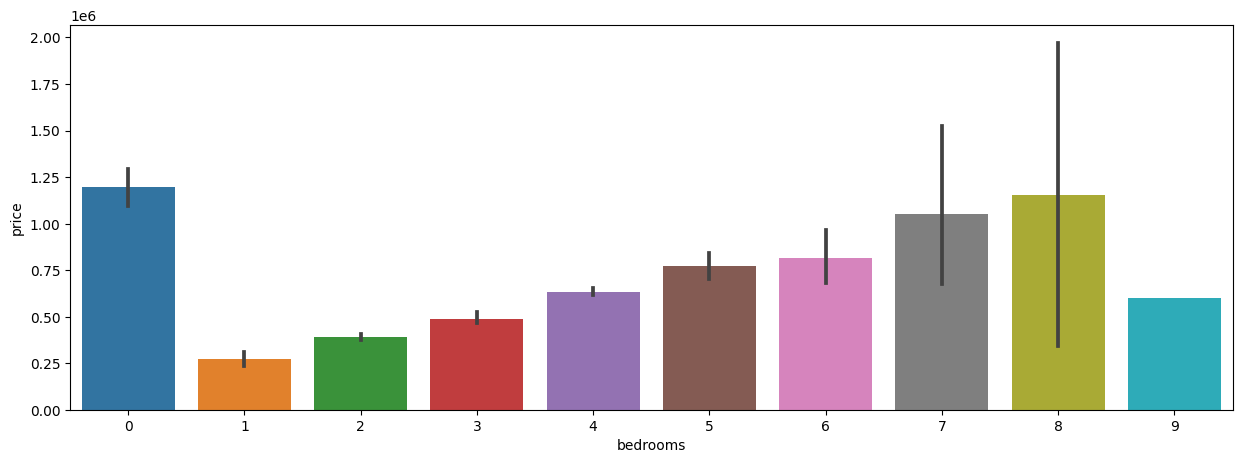

In [ ]:
size=(15, 5)
fig, ax = plt.subplots(figsize=size)
sns.barplot(x = data.bedrooms, y = data.price)

In [ ]:
ints = [x for x in data.columns if str(data[x].dtype) == 'int64']
floats = [x for x in data.columns if str(data[x].dtype) == 'float64']
objects = [x for x in data.columns if str(data[x].dtype) == 'object']

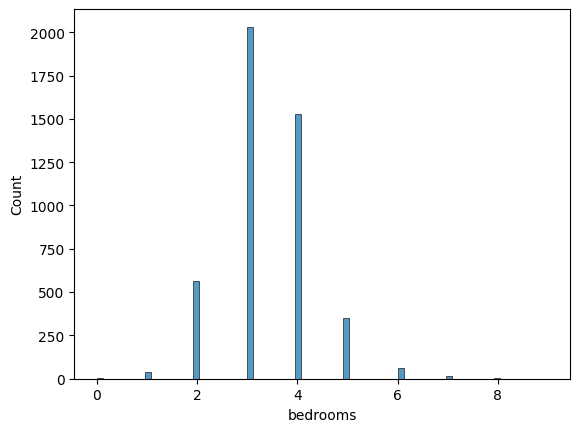

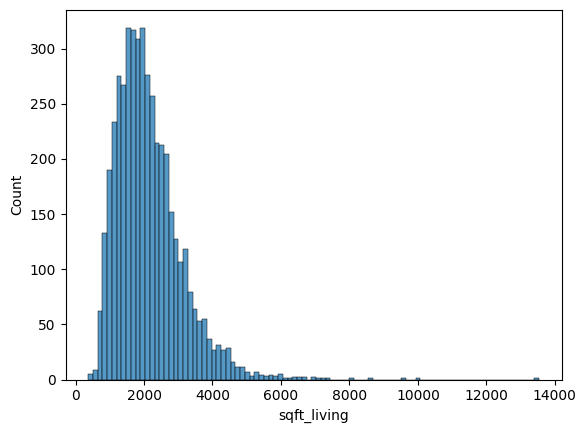

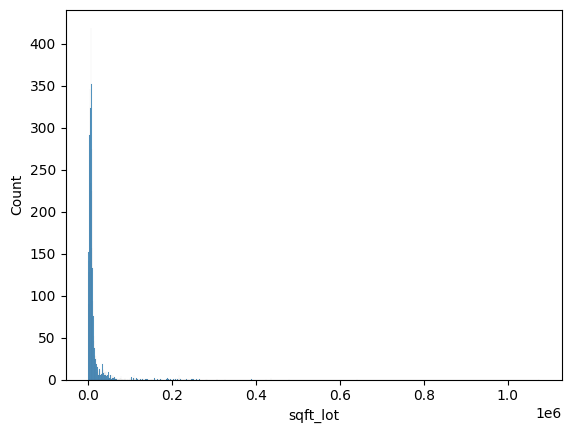

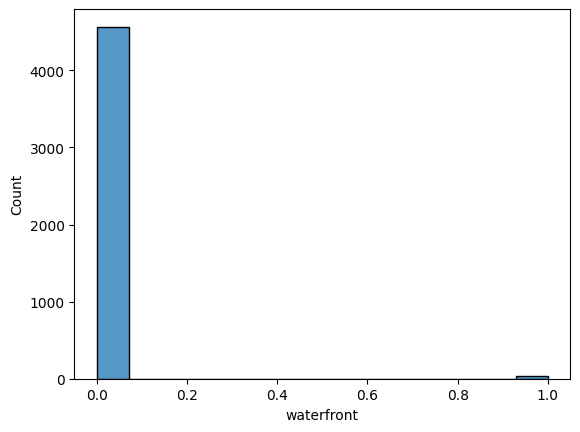

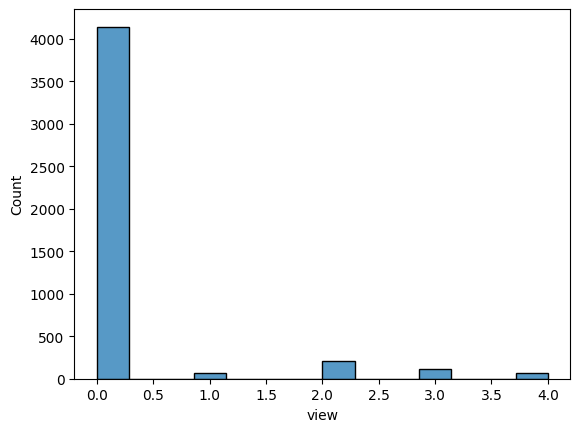

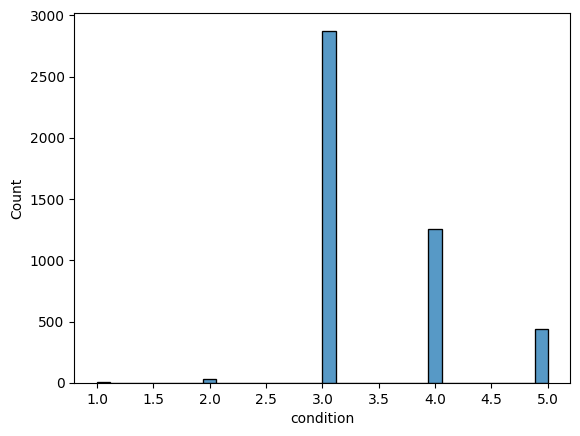

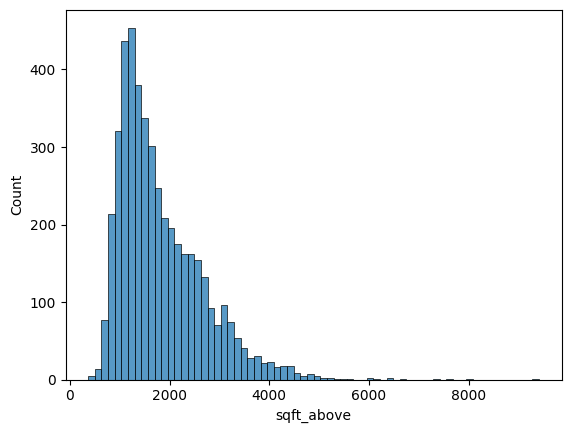

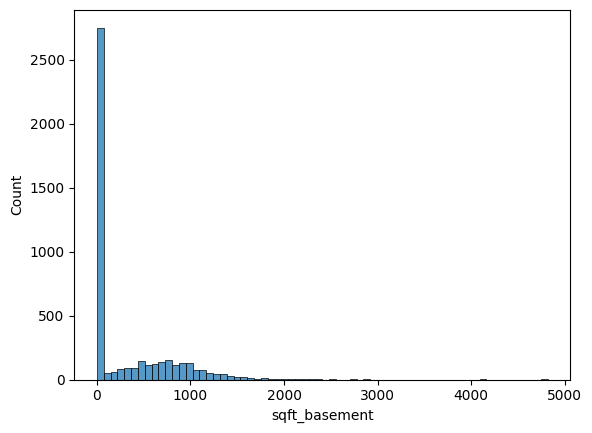

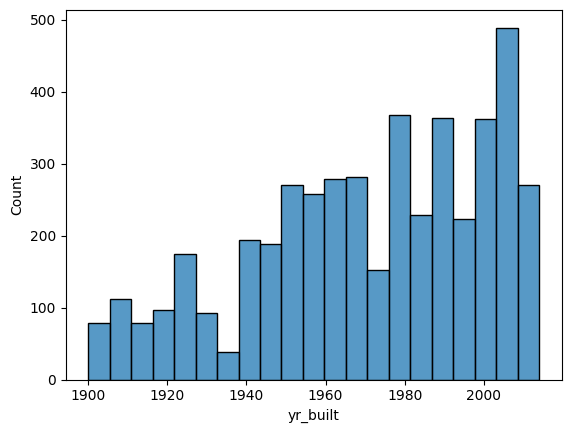

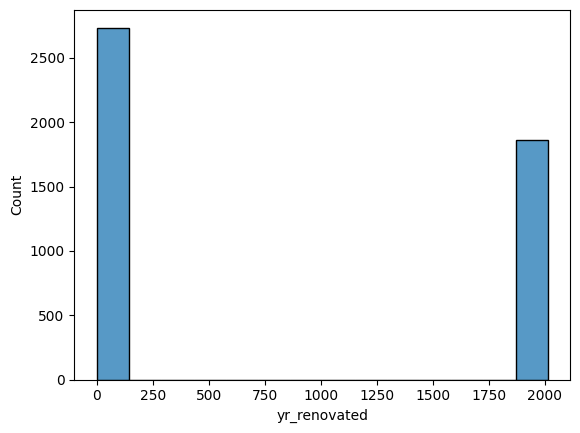

In [ ]:
for i in ints:
  sns.histplot(data=data,x=data[i])
  plt.show()

In [ ]:
data.yr_built = pd.cut(data.yr_built,bins=range(1900,2021,20), labels=range(1910, 2011, 20))

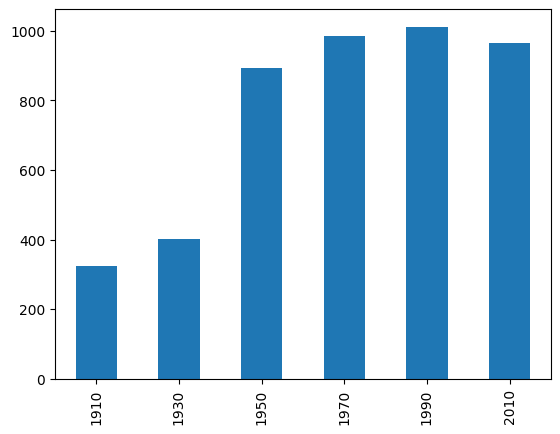

In [ ]:
data.yr_built.value_counts().sort_index().plot(kind='bar')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
for i in ints+floats:
  min=MinMaxScaler()
  stan=StandardScaler()
  data[i+'_min'] = min.fit_transform(np.array(data[i]).reshape(-1,1))
  data[i+'_std']=stan.fit_transform(np.array(data[i]).reshape(-1,1))
  data=data.drop(i,axis=1)
data.head()

,date,street,city,statezip,country,bedrooms_std,sqft_living_std,sqft_lot_std,waterfront_std,view_std,...,waterfront_min,view_min,condition_min,sqft_above_min,sqft_basement_min,yr_built_min,yr_renovated_min,price_min,bathrooms_min,floors_min
0,02-05-2014 0:00,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.441122,-0.829971,-0.193434,-0.085004,-0.309194,...,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,0.011771,0.18750,0.2
1,02-05-2014 0:00,709 W Blaine St,Seattle,WA 98119,USA,1.759705,1.568528,-0.161718,-0.085004,4.830079,...,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,0.089658,0.31250,0.4
2,02-05-2014 0:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.441122,-0.217367,-0.080978,-0.085004,-0.309194,...,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,0.012862,0.25000,0.0
3,02-05-2014 0:00,857 170th Pl NE,Bellevue,WA 98008,USA,-0.441122,-0.144686,-0.190145,-0.085004,-0.309194,...,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,0.015795,0.28125,0.0
4,02-05-2014 0:00,9105 170th Ave NE,Redmond,WA 98052,USA,0.659291,-0.206984,-0.121306,-0.085004,-0.309194,...,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,0.020684,0.31250,0.0


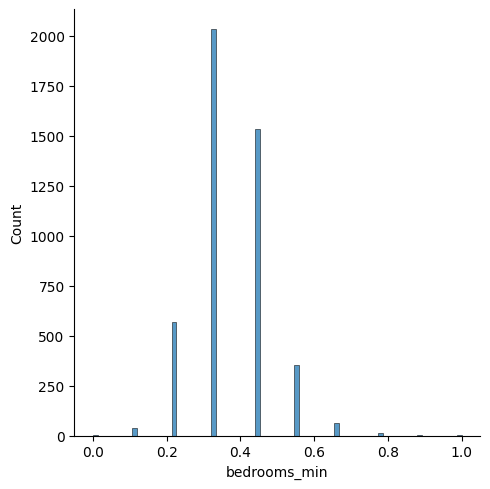

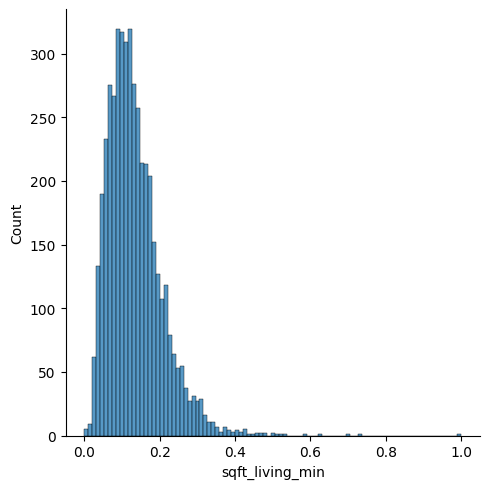

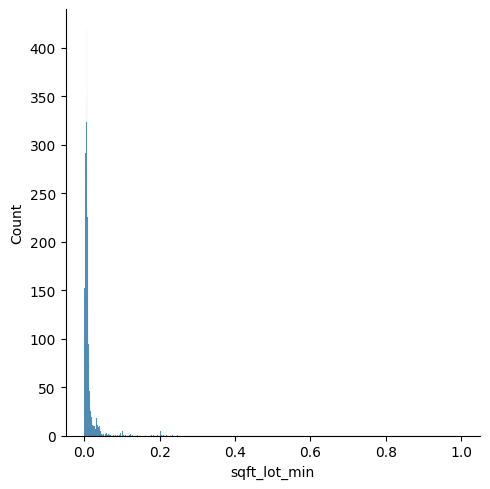

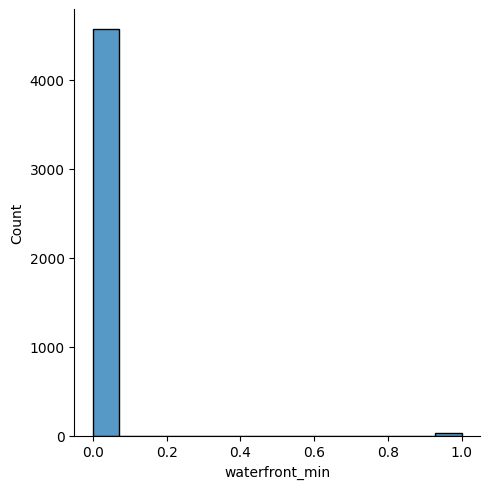

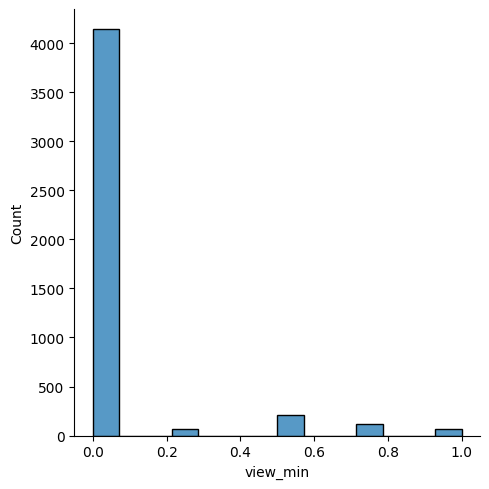

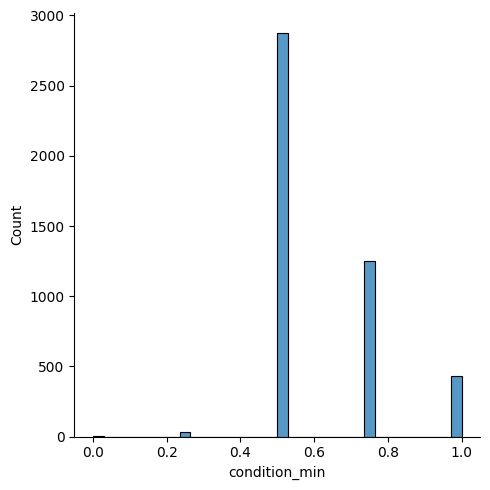

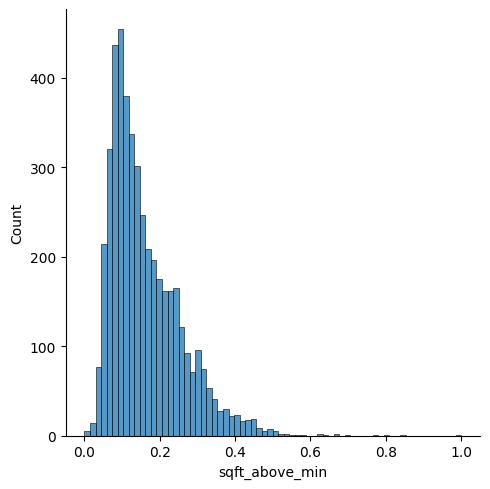

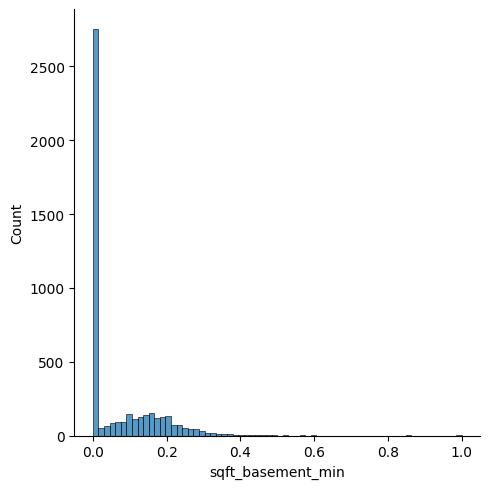

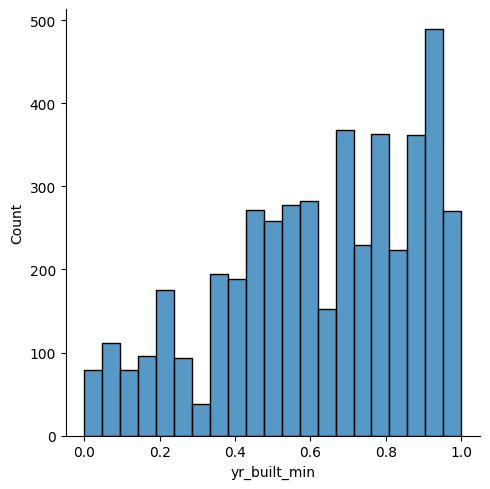

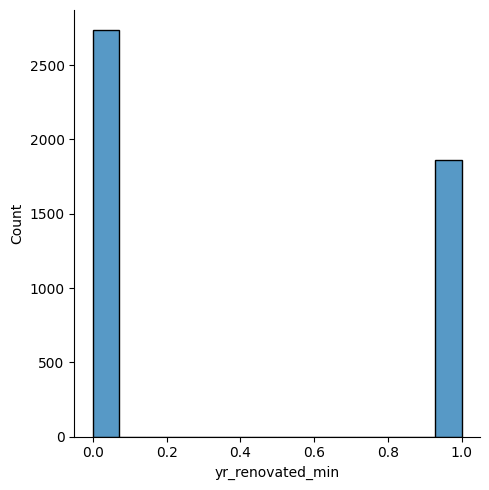

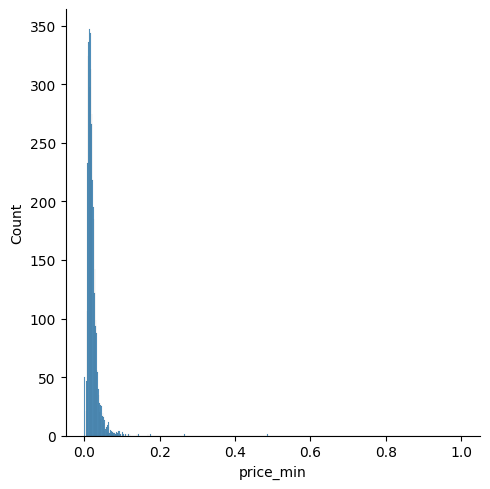

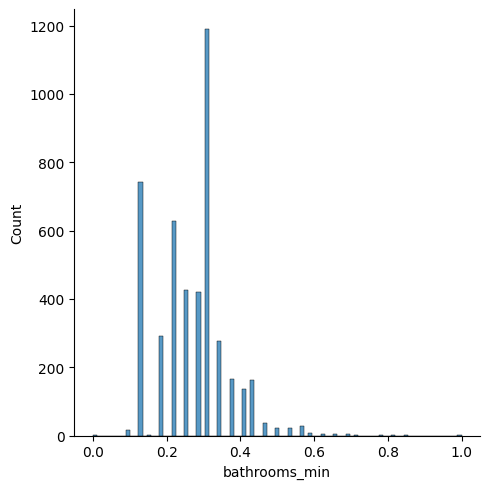

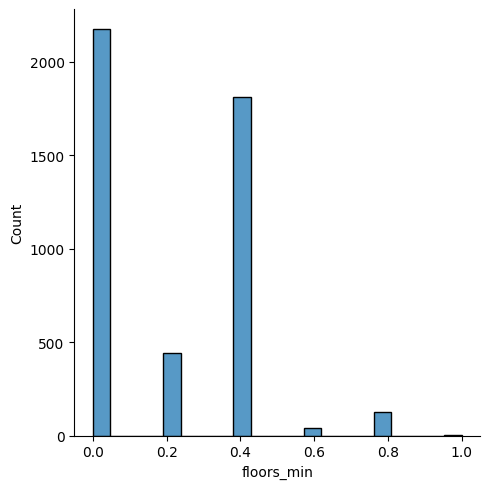

In [ ]:
for i in ints+floats:
  sns.displot(data[i+'_min'])
  plt.show()

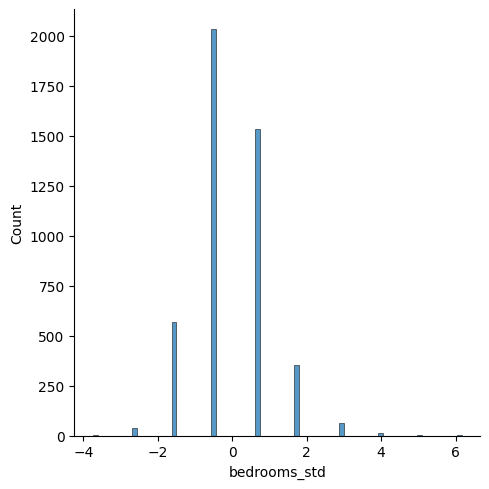

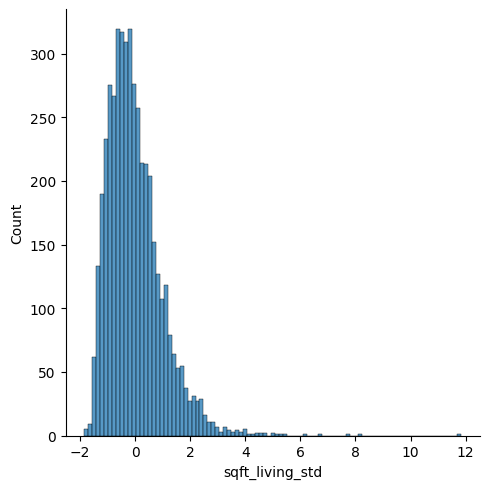

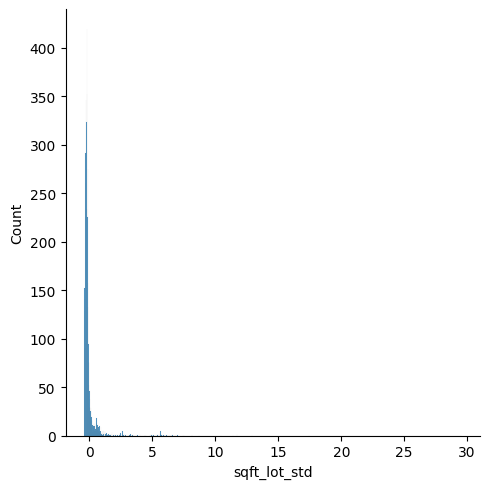

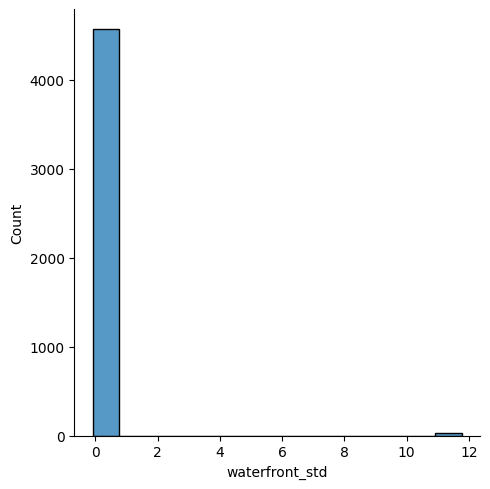

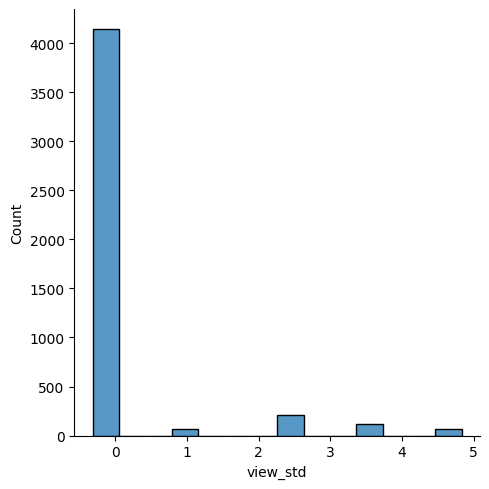

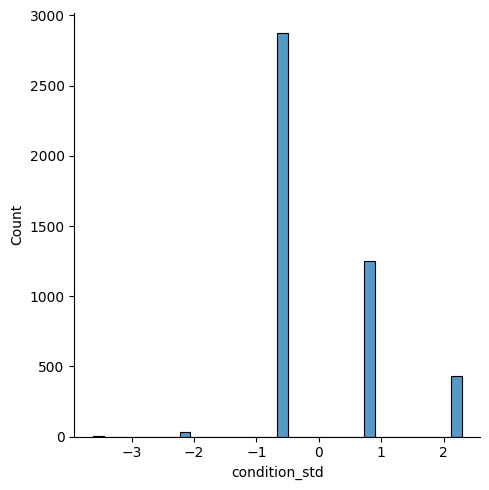

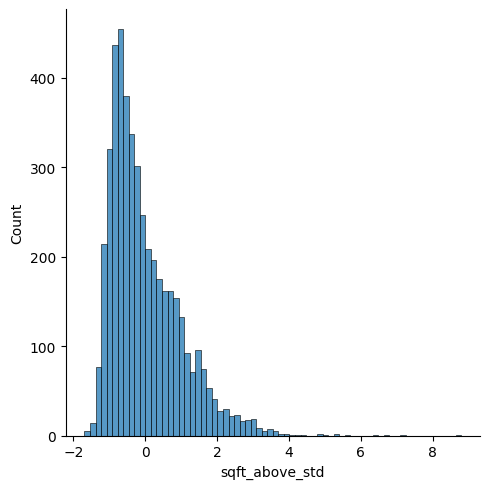

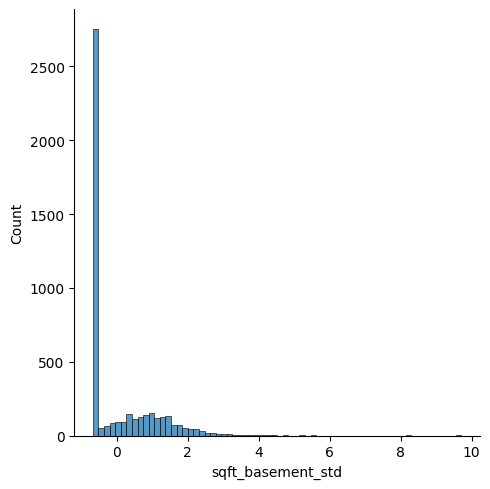

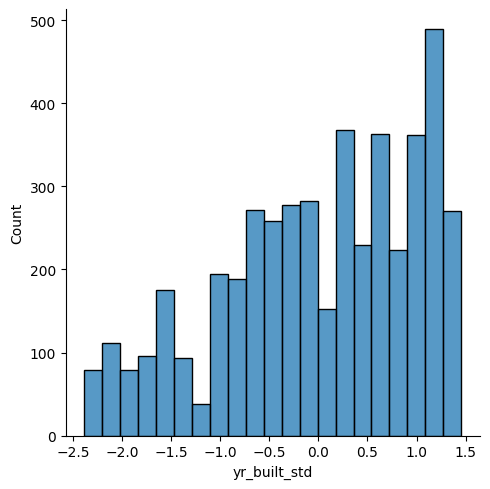

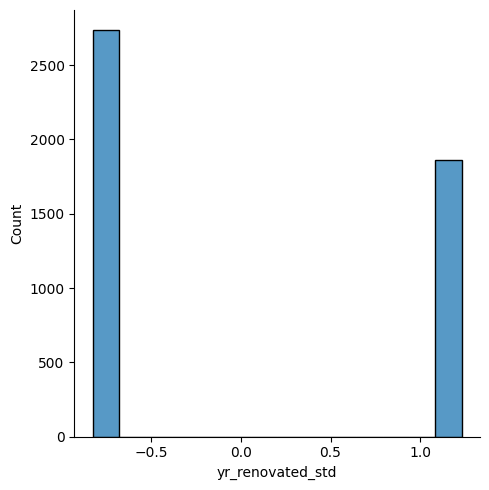

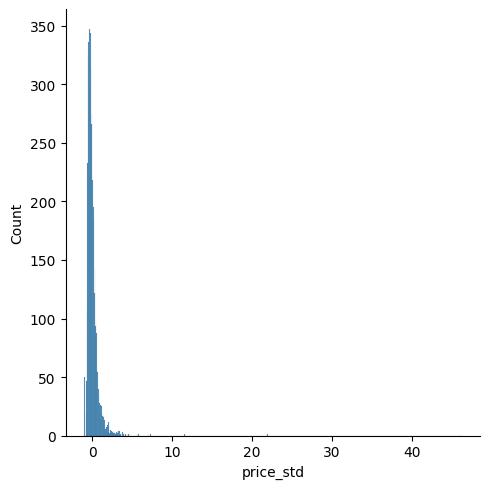

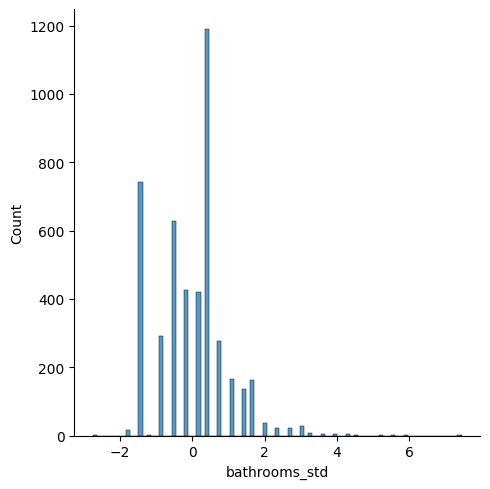

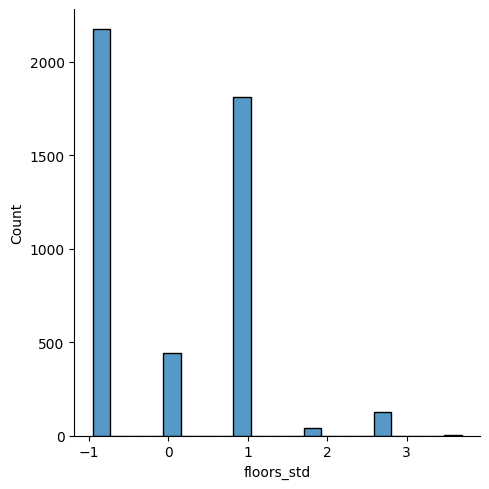

In [ ]:
for i in ints+floats:
  sns.displot(data[i+'_std'])
  plt.show()